# Employee Retention - Classification

## Part 1. EDA

<br>

<a id='toc'></a>
**Table of Contents**

1. [Overview](#over)
2. [Categorical Features](#cat)
3. [Numerical Features](#num)
4. [Segmentation](#seg)
5. [Correlation](#corr)
6. [Appendix](#app)


In [3]:
# Load libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import pprint
import os

In [5]:
os.listdir('../data/')

['employee_data.csv']

<a id = 'over'></a>
### 1. Overview

In [4]:
# Load data
df = pd.read_csv('../data/employee_data.csv')
print(df.shape)

(14249, 10)


In [5]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [9]:
df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


In [6]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [7]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [26]:
df.filed_complaint.count()/df.shape[0]

0.14443118815355463

In [27]:
df.recently_promoted.count()/df.shape[0]

0.02105410906028493

In [8]:
df.describe(include='object')

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


[back to top](#toc)

### 2. Categorical features

In [10]:
num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
cat_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

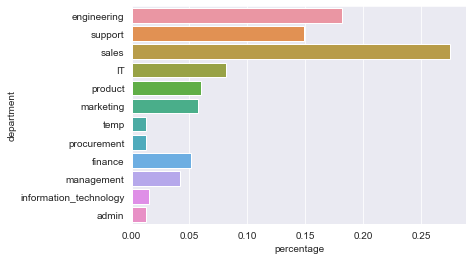

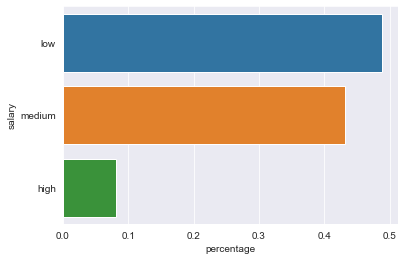

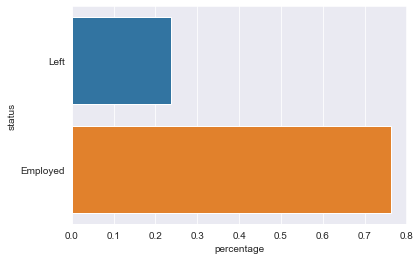

In [11]:
for col in cat_cols:
    sns.barplot(y = col, x = num_cols[0], data = df, estimator = lambda x: len(x)*1.0/len(df))
    plt.xlabel('percentage')
    plt.show()

In [12]:
df.status.value_counts()

Employed    10857
Left         3392
Name: status, dtype: int64

[back to top](#toc)

<a id = 'num'></a>

### 3. Numerical Features

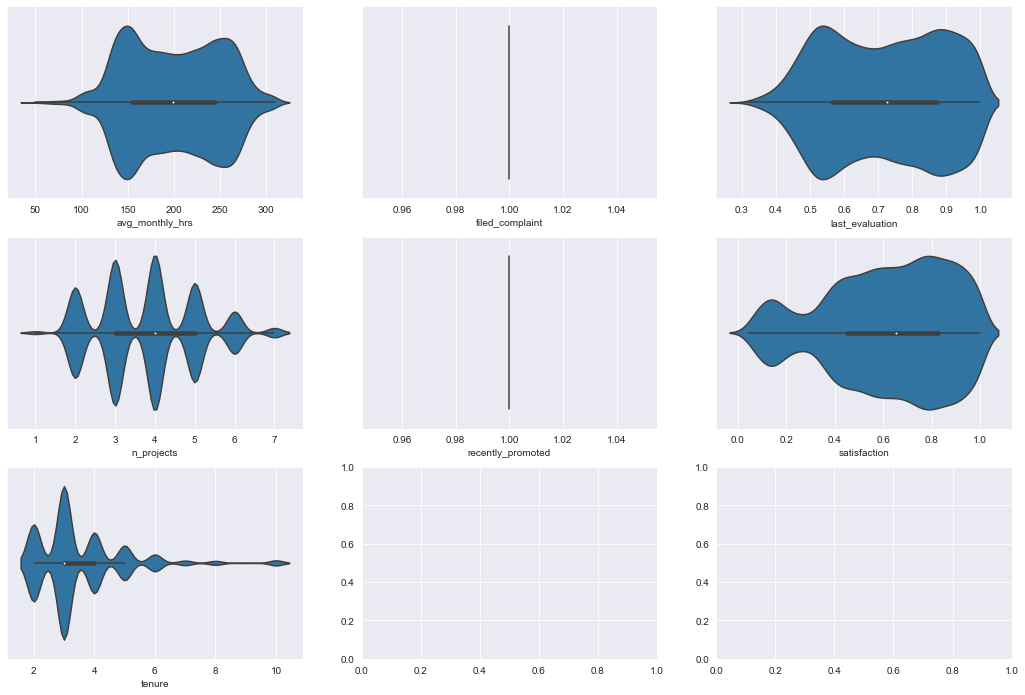

In [19]:
fig, axes = plt.subplots(int(np.ceil(len(num_cols)/3)), 3, figsize = (18, 12))
axes = axes.ravel()

for i in range(len(num_cols)):
    sns.violinplot(df[num_cols[i]], ax = axes[i])
    axes[i].set_xlabel(num_cols[i])    

[back to top](#toc)

<a id = 'seg'></a>

### 4. Segmentation (num vs. cat)

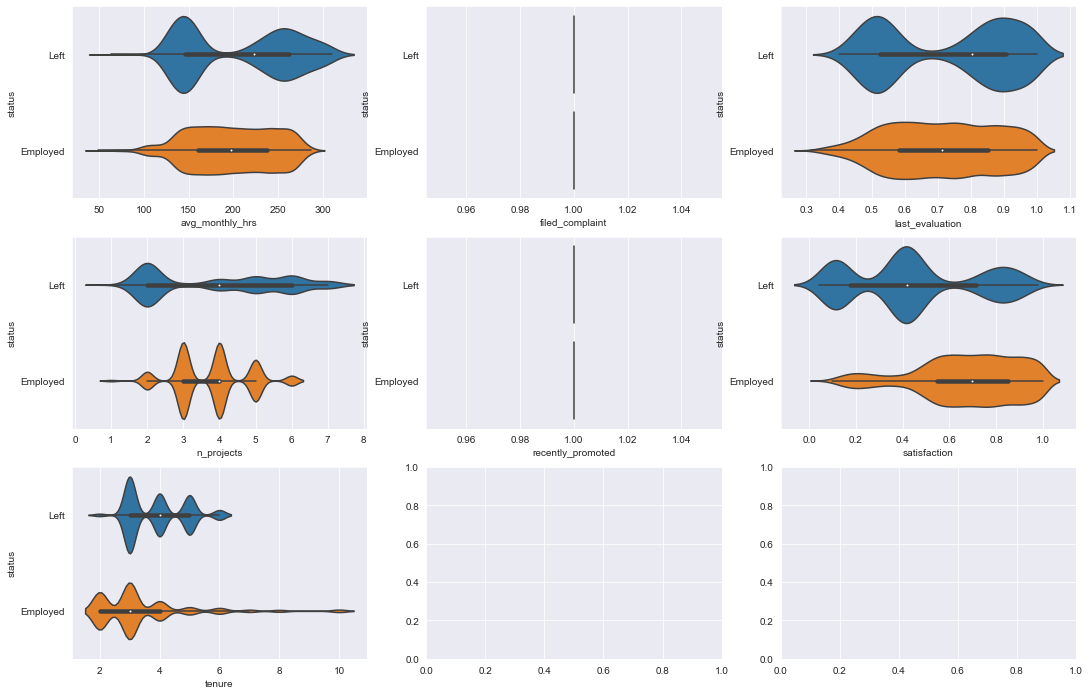

In [20]:
fig, axes = plt.subplots(int(np.ceil(len(num_cols)/3)),3, figsize = (18, 12))
axes = axes.ravel()
for i in range(len(num_cols)):
    sns.violinplot(x = df[num_cols[i]], y = 'status', data = df, ax = axes[i])

In [59]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


In [66]:
df.filed_complaint.fillna(0, inplace = True)
df.recently_promoted.fillna(0, inplace = True)

In [67]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.675979,3.380245
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.447500,3.869023


In [68]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [69]:
df.salary.replace({'low':0, 'medium':1, 'high':2}, inplace = True)

In [71]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
status,,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.648061,0.675979,3.380245
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.416274,0.447500,3.869023


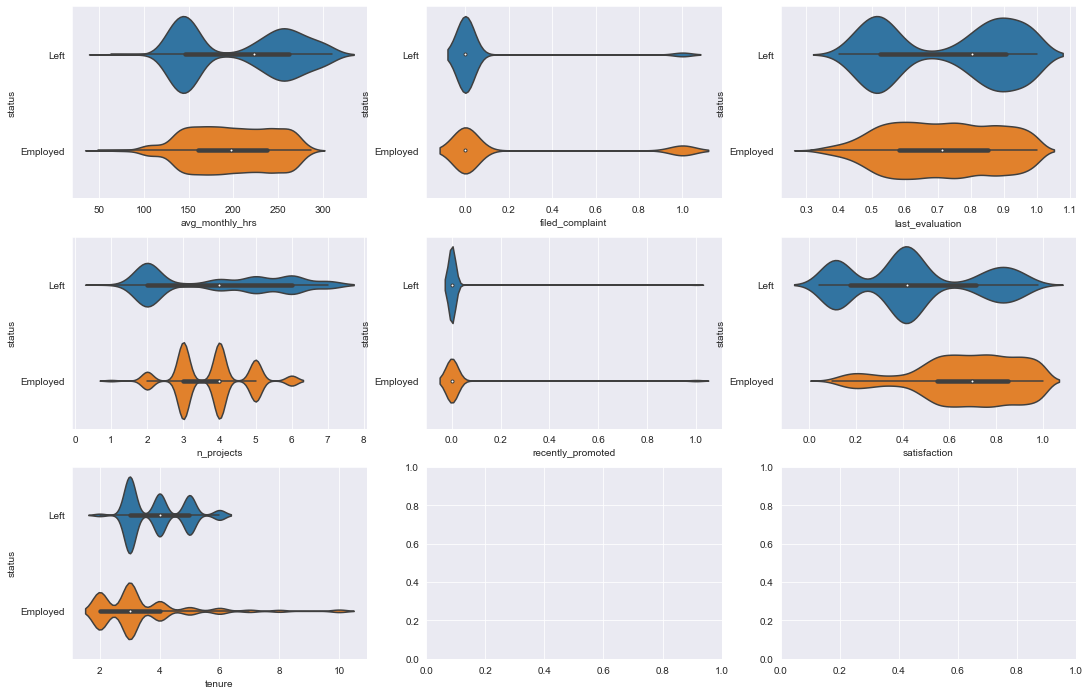

In [72]:
fig, axes = plt.subplots(math.ceil(len(num_cols)/3),3, figsize = (18, 12))
axes = axes.ravel()
for i in range(len(num_cols)):
    sns.violinplot(x = df[num_cols[i]], y = 'status', data = df, ax = axes[i])

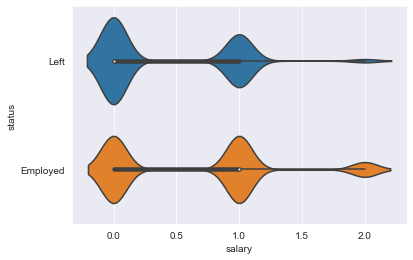

In [75]:
sns.violinplot(x = 'salary', y = 'status', data = df)
plt.show()

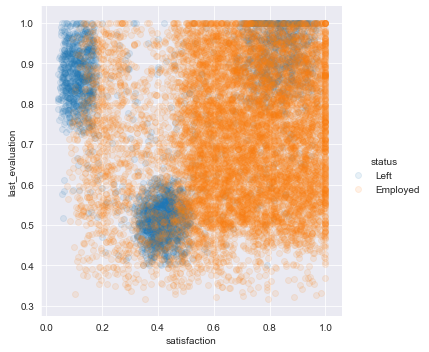

In [82]:
sns.lmplot(x = 'satisfaction', y = 'last_evaluation', hue = 'status', 
           data = df, fit_reg = False, scatter_kws={'alpha': 0.1})
plt.show()

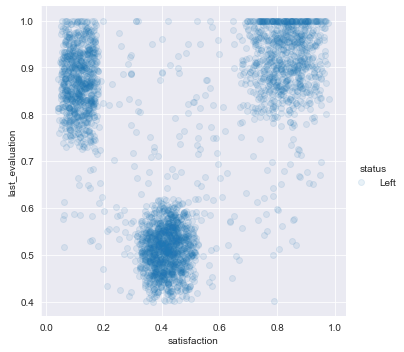

In [93]:
sns.lmplot(x = 'satisfaction', y = 'last_evaluation', hue = 'status', 
           data = df[df.status=='Left'], fit_reg = False, scatter_kws={'alpha': 0.1})
plt.show()

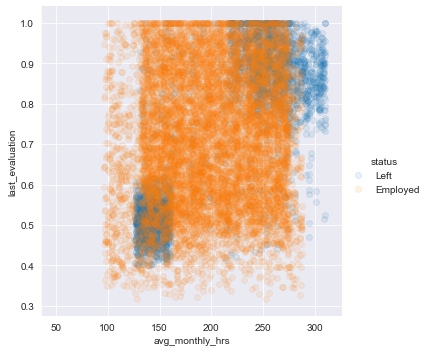

In [84]:
sns.lmplot(x = 'avg_monthly_hrs', y = 'last_evaluation', hue = 'status', 
           data = df, fit_reg = False, scatter_kws={'alpha': 0.1})
plt.show()

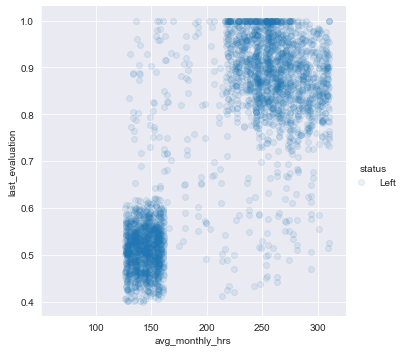

In [95]:
sns.lmplot(x = 'avg_monthly_hrs', y = 'last_evaluation', hue = 'status', 
           data = df[df.status == 'Left'], fit_reg = False, scatter_kws={'alpha': 0.1})
plt.show()

In [91]:
df.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
avg_monthly_hrs,1.000000,-0.009265,0.340136,0.443221,0.002533,-0.004641,-0.019622,0.124954
filed_complaint,-0.009265,1.000000,-0.014694,-0.005337,0.042651,0.012532,0.056338,0.007224
last_evaluation,0.340136,-0.014694,1.000000,0.345590,-0.008359,-0.016325,0.089189,0.132100
n_projects,0.443221,-0.005337,0.345590,1.000000,-0.001616,-0.002571,-0.143514,0.192653
recently_promoted,0.002533,0.042651,-0.008359,-0.001616,1.000000,0.097138,0.025797,0.068991
salary,-0.004641,0.012532,-0.016325,-0.002571,0.097138,1.000000,0.054131,0.048980
satisfaction,-0.019622,0.056338,0.089189,-0.143514,0.025797,0.054131,1.000000,-0.097301
tenure,0.124954,0.007224,0.132100,0.192653,0.068991,0.048980,-0.097301,1.000000


[back to top](#toc)
<a id = 'corr'></a>
## 5. Correlations

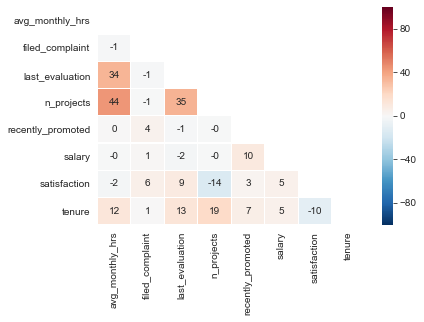

In [107]:
sns.set_style('whitegrid')
mask = np.zeros_like(df.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr()*100, mask = mask, annot = True, cmap='RdBu_r', fmt = '.0f', vmin = -100, vmax = 100, linewidth = 0.1)
plt.show()

In [111]:
df['department'].replace('information_technology', 'IT', inplace = True)

In [112]:
df.groupby('department').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
department,,,,,,,,
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.572263,0.628079,3.456204
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.596591,0.611450,3.369318
engineering,202.469522,0.138889,0.722332,3.872299,0.010031,0.564815,0.617907,3.402392
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.641484,0.586787,3.543956
management,201.025210,0.173109,0.729714,3.857143,0.114286,1.057143,0.630428,4.294118
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.620269,0.629122,3.567766
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.557471,0.627930,3.264368
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.577907,0.628774,3.487209
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.556207,0.623075,3.527148


[Back to top](#toc)

<div class = 'alert alert-info'>
<a id = 'app'></a>

### Appendix
    
**1. Observations from EDA:**

1. Leavers: longer hour, less promotion, lower paid, doesn't file complaints
    1. low or high monthly hours: under utilized and burn outs
    2. low or high evaluation: underperformer and starperformer
    3. mainly low # of projects to work
    4. even highly satisfied leave
2. Stayers:
    1. happy, been here a long time, and high income earners


</div>

<div class = 'alert alert-info'>

**2. Notes for data cleaning:**

- cat_cols:
    - unwated observation: department = temp
    - structural errors: department = IT/information_technology
    - missing values: department
    - cat->ord: salary
    - cat->target: status

- num_cols:
    - num->ind: filed_complaint, recently_promoted
    - missing values: all except for avg_monthly_hrs
    - outliers: doesn't appear to have any
    
</div>